In [1]:
!pip install pandas numpy matplotlib seaborn statsmodels scikit-learn

     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.2 kB 1.3 MB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.2 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 653.5 kB/s eta 0:00:00
     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     ---------------------- ---------------- 92.2/160.8 kB 2.6 MB/s eta 0:00:01
     --------------------------------- ---- 143.4/160.8 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 160.8/160.8 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 6.8 MB/s eta 0:00:02
    --------------------------------------- 0.2/11.6 MB 2.1 MB/s eta 0:00:06

In [2]:
import pandas as pd

data = {'Дата': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
        'Продажи': [1000, 1200, 1300, 1100, 1400]}

df = pd.DataFrame(data)

# Преобразуем столбец 'Дата' в формат даты
df['Дата'] = pd.to_datetime(df['Дата'])

print(df)

        Дата  Продажи
0 2023-01-01     1000
1 2023-02-01     1200
2 2023-03-01     1300
3 2023-04-01     1100
4 2023-05-01     1400


C:\Users\aleks\AppData\Local\Temp\ipykernel_10184\4257205928.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
subset = df[(df["Дата"] >= "2023-03-01") & (df["Дата"] <= "2023-04-30")]
print(subset)

        Дата  Продажи
2 2023-03-01     1300
3 2023-04-01     1100


## Timeseries analysis

### Stationarity test

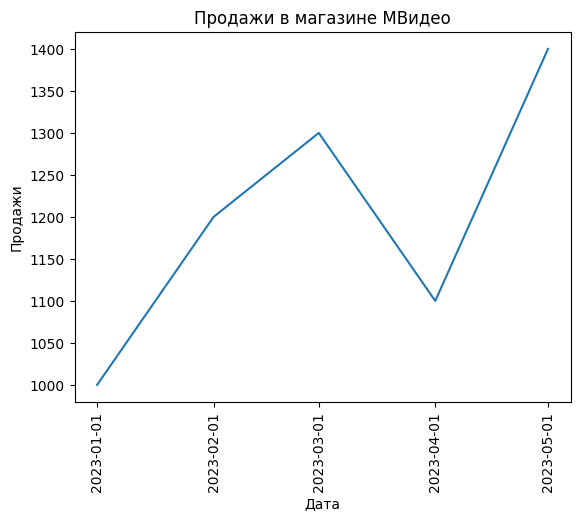

ADF Statistic: -2.160247
p-value: 0.220988
Critical Values:
	1%: -7.355
	5%: -4.474
	10%: -3.127


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Создаем dataset с данными о продажах
data = {'Дата': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
        'Продажи': [1000, 1200, 1300, 1100, 1400]}

df = pd.DataFrame(data)

# Преобразуем столбец 'Дата' в формат даты
df['Дата'] = pd.to_datetime(df['Дата'])

# Построим график продаж
plt.plot(df['Дата'], df['Продажи'])
plt.title('Продажи в магазине МВидео')
plt.xlabel('Дата')
plt.xticks(df['Дата'], rotation='vertical')
plt.ylabel('Продажи')
plt.show()

# Проведем тест Дики-Фуллера на стационарность
result = adfuller(df['Продажи'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

### Make timeseries stationary

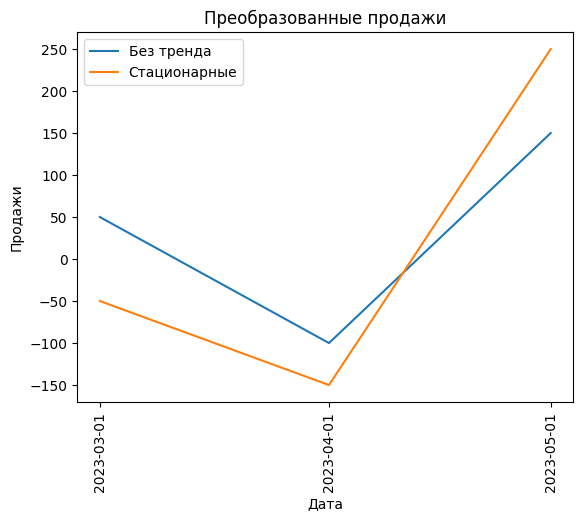

In [10]:
# Преобразование для удаления тренда
df['Продажи_без_тренда'] = df['Продажи'] - df['Продажи'].rolling(window=2).mean()

# Преобразование для удаления сезонности (в данном случае просто разница между текущим и предыдущим значением)
df['Продажи_стационарные'] = df['Продажи_без_тренда'].diff()

# Удалим первые строки с пропущенными значениями
df.dropna(inplace=True)

# Построим графики
plt.plot(df['Дата'], df['Продажи_без_тренда'], label='Без тренда')
plt.plot(df['Дата'], df['Продажи_стационарные'], label='Стационарные')
plt.legend()
plt.title('Преобразованные продажи')
plt.xticks(df['Дата'], rotation="vertical")
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

## Timeseries components

### Trend

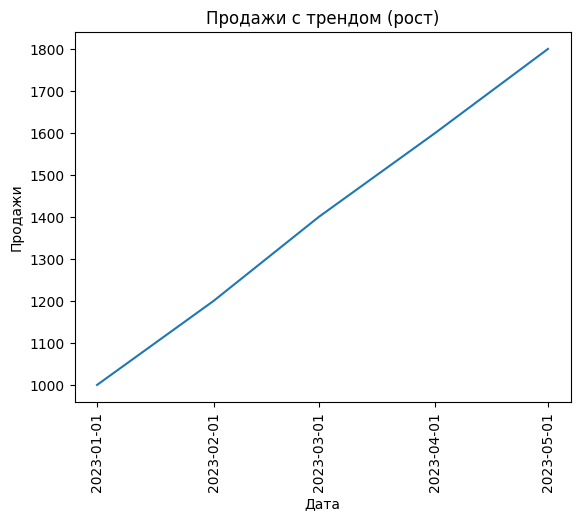

In [12]:

# Создаем dataset с данными о продажах с трендом
data_trend = {'Дата': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
              'Продажи': [1000, 1200, 1400, 1600, 1800]}

df_trend = pd.DataFrame(data_trend)

# Преобразуем столбец 'Дата' в формат даты
df_trend['Дата'] = pd.to_datetime(df_trend['Дата'])

# Построим график продаж с трендом
plt.plot(df_trend['Дата'], df_trend['Продажи'])
plt.title('Продажи с трендом (рост)')
plt.xlabel('Дата')
plt.xticks(df_trend['Дата'], rotation='vertical')
plt.ylabel('Продажи')
plt.show()

### Seasonality

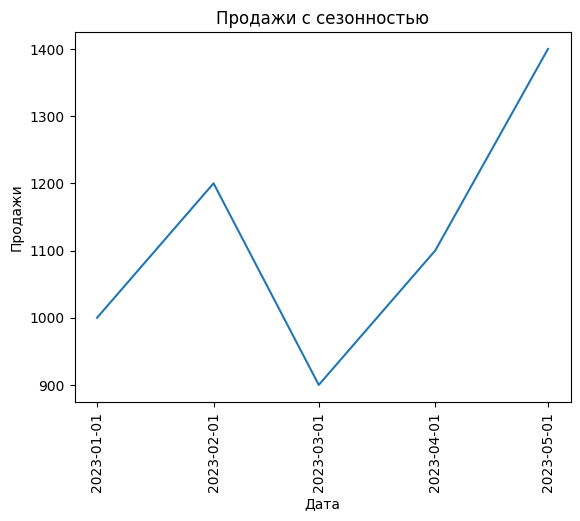

In [13]:
# Создаем dataset с данными о продажах с сезонностью
data_seasonal = {'Дата': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
                 'Продажи': [1000, 1200, 900, 1100, 1400]}

df_seasonal = pd.DataFrame(data_seasonal)

# Преобразуем столбец 'Дата' в формат даты
df_seasonal['Дата'] = pd.to_datetime(df_seasonal['Дата'])

# Построим график продаж с сезонностью
plt.plot(df_seasonal['Дата'], df_seasonal['Продажи'])
plt.title('Продажи с сезонностью')
plt.xlabel('Дата')
plt.xticks(df_seasonal['Дата'], rotation="vertical")
plt.ylabel('Продажи')
plt.show()

### Noise

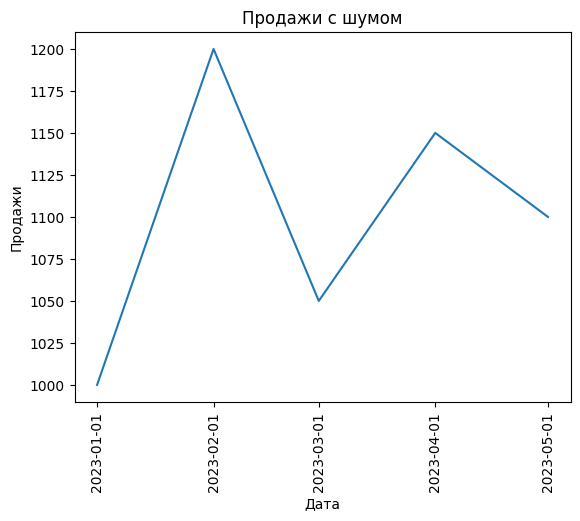

In [14]:
# Создаем dataset с данными о продажах с шумом
data_noise = {'Дата': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
              'Продажи': [1000, 1200, 1050, 1150, 1100]}

df_noise = pd.DataFrame(data_noise)

# Преобразуем столбец 'Дата' в формат даты
df_noise['Дата'] = pd.to_datetime(df_noise['Дата'])

# Построим график продаж с шумом
plt.plot(df_noise['Дата'], df_noise['Продажи'])
plt.title('Продажи с шумом')
plt.xlabel('Дата')
plt.xticks(df_noise['Дата'], rotation="vertical")
plt.ylabel('Продажи')
plt.show()

## Autocorrelation and partial correlation

C:\Users\aleks\AppData\Local\Temp\ipykernel_10184\4293974004.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2023-01-01', end='2023-01-07', freq='H')


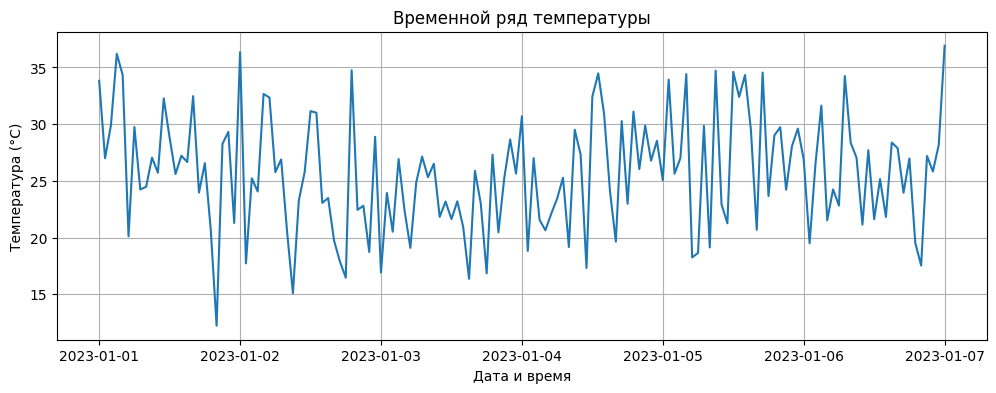

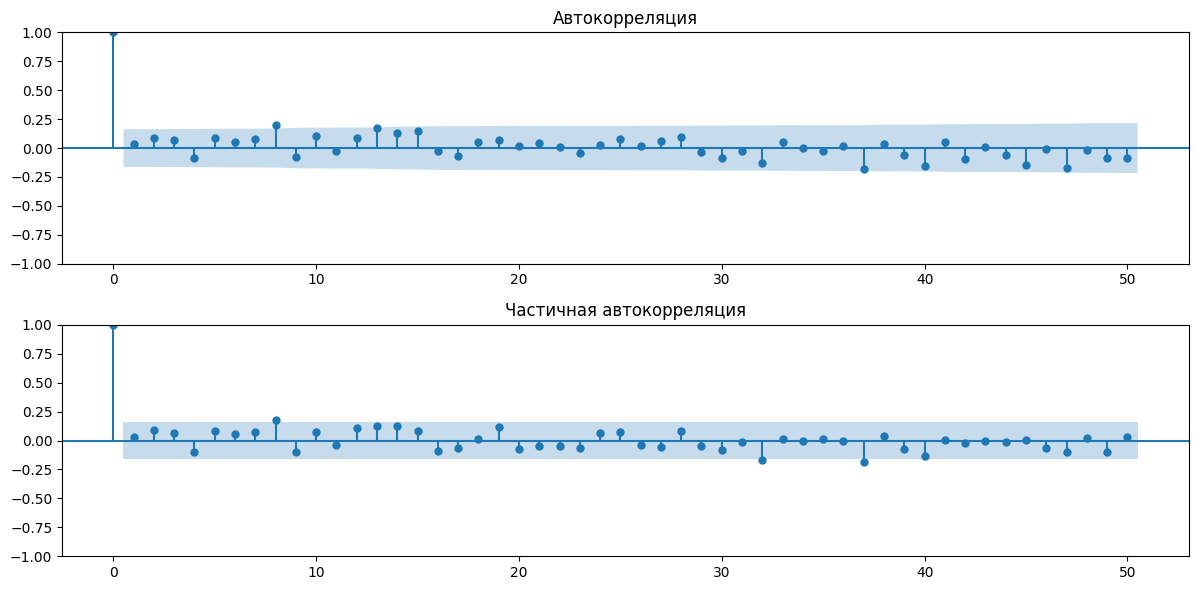

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Создаем небольшой временной ряд температуры
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', end='2023-01-07', freq='H')
temperature = np.random.normal(loc=25, scale=5, size=len(dates))
df_temperature = pd.DataFrame({'Дата': dates, 'Температура': temperature})

# Устанавливаем 'Дата' в качестве индекса
df_temperature.set_index('Дата', inplace=True)

# Построим график временного ряда
plt.figure(figsize=(12, 4))
plt.plot(df_temperature.index, df_temperature['Температура'])
plt.title('Временной ряд температуры')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.grid(True)
plt.show()

# Рассчитываем автокорреляцию и частичную автокорреляцию
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df_temperature['Температура'], lags=50, ax=plt.gca())
plt.title('Автокорреляция')

plt.subplot(212)
plot_pacf(df_temperature['Температура'], lags=50, ax=plt.gca())
plt.title('Частичная автокорреляция')

plt.tight_layout()
plt.show()

## Example: forecasting sales based on timeseries

In [23]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Создаем даты с января 2022 года по декабрь 2023 года
dates = pd.date_range(start='2022-01-01', end='2023-12-31', freq='ME')

# Генерируем случайные продажи в интервале от 1000 до 5000
sales = np.random.randint(1000, 5000, size=len(dates))

# Создаем DataFrame
sales_df = pd.DataFrame({'Дата': dates, 'Продажи': sales})

# Устанавливаем 'Дата' в качестве индекса
sales_df.set_index('Дата', inplace=True)

# Выводим первые несколько строк
sales_df.head()

,Продажи
Дата,
2022-01-31,4174
2022-02-28,4507
2022-03-31,1860
2022-04-30,2294
2022-05-31,2130


### Visualization

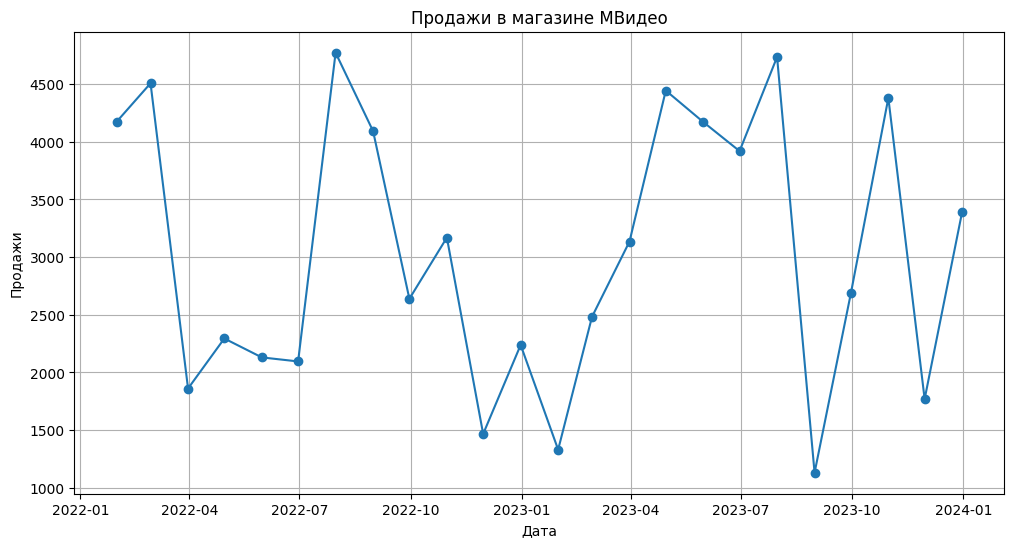

In [24]:
import matplotlib.pyplot as plt

# Построим график продаж
plt.figure(figsize=(12, 6))
plt.plot(sales_df.index, sales_df['Продажи'], marker='o', linestyle='-')
plt.title('Продажи в магазине МВидео')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.grid(True)
plt.show()

In [25]:
# Обработка пропущенных значений (если они есть)
sales_df.dropna(inplace=True)

# Проверка стационарности ряда
from statsmodels.tsa.stattools import adfuller

result = adfuller(sales_df['Продажи'])
print('ADF статистика:', result[0])
print('p-значение:', result[1])
print('Критические значения:')
for key, value in result[4].items():
    print(f'  {key}: {value}') 

ADF статистика: -4.066983346706801
p-значение: 0.0010976525015186794
Критические значения:
  1%: -3.7529275211638033
  5%: -2.998499866852963
  10%: -2.6389669754253307


### Model training

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Обучение модели ARIMA
model = ARIMA(sales_df['Продажи'], order=(1, 1, 1))
model_fit = model.fit()

# Вывод статистики модели
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Продажи   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -195.887
Date:                Tue, 23 Jan 2024   AIC                            397.775
Time:                        18:58:22   BIC                            401.181
Sample:                    01-31-2022   HQIC                           398.631
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1716      0.271      0.634      0.526      -0.359       0.702
ma.L1         -0.9995      0.491     -2.035      0.042      -1.962      -0.037
sigma2      1.305e+06   3.78e-07   3.45e+12      0.0

d:\Programming Train\time_series_ml\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Programming Train\time_series_ml\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Programming Train\time_series_ml\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


### Model estimation

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Прогноз на основе обученной модели
forecast = model_fit.forecast(steps=12)

# Рассчитываем MSE и MAE
mse = mean_squared_error(sales_df['Продажи'][-12:], forecast)
mae = mean_absolute_error(sales_df['Продажи'][-12:], forecast)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 1494299.406890409
MAE: 1077.541947204875


### Model prediction

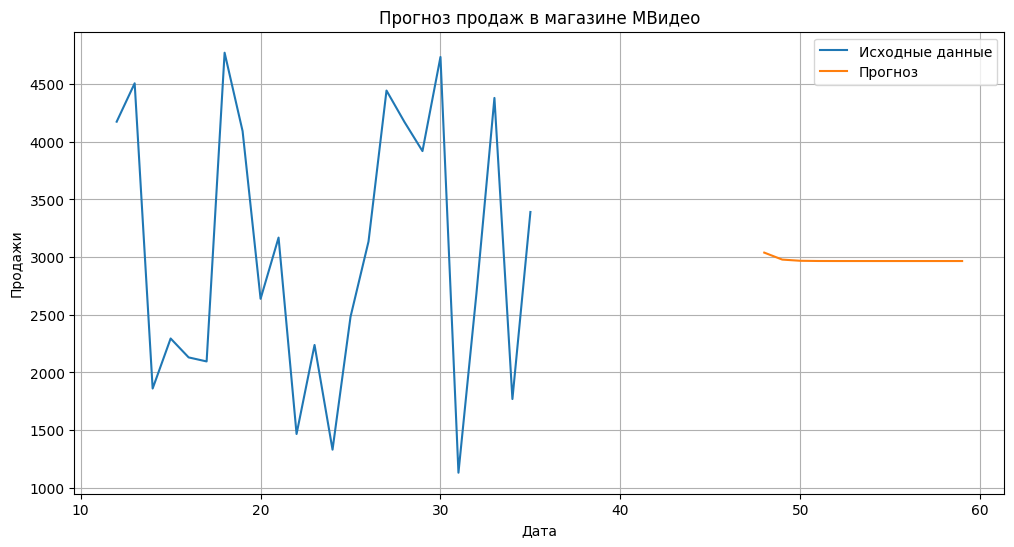

In [35]:
# Прогноз на будущее (следующие 12 месяцев)
forecast_future = model_fit.forecast(steps=12)

# Создаем новый DataFrame для будущих значений
future_dates = pd.date_range(start='2024-01-01', periods=12, freq='ME')
forecast_df = pd.DataFrame({'Дата': future_dates, 'Прогноз продаж': forecast_future})

# Присоединяем прогноз к исходному DataFrame
sales_df = pd.concat([sales_df, forecast_df], ignore_index=True)

# Визуализация исходных данных и прогноза
plt.figure(figsize=(12, 6))
plt.plot(sales_df.index[:-12], sales_df['Продажи'][:-12], label='Исходные данные')
plt.plot(sales_df.index[-12:], sales_df['Прогноз продаж'][-12:], label='Прогноз')
plt.title('Прогноз продаж в магазине МВидео')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.grid(True)
plt.show()